http://www.incompleteideas.net/book/first/ebook/node41.html

# Dynamic Programming 

This is a category of algorithsm to find **optimal policies** which have a 

COMPLETE KNOWLEDGE of the environment as an MDP (Markov Decision Process)

## The Bellman Equations

For **any policy** $\pi$, all $s \in S$ and $a \in A(s)$

Dynamic Programming follow the Bellman Equations

## The Value of State Function

$$

V_{\pi}(s) = \sum_{a \in A(s)} \pi(a|s)q_{\pi}(s,a) = \mathbb{E}_{\pi} \{r_{t+1} + {\gamma}{V}_{\pi}(s_{t+1}) | s_t = s\}

$$

"Value of state, is the policy-weighted average of action values"

## The probability function


$$

q_{\pi}(s, a) = \sum_{\substack{s' \in S \\ r \in R}} p(s', r|s, a)[r + {\gamma}V_{\pi}(s')]

$$

## Now, the Bellman Optimality 

#### First let's define some convenient transition probabilities

(After some annoying mathematical substitutions...)

$$

V_{*}(s) = \max_{a \in A(s)} q_*(s, a) = \max_{a}\mathbb{E}\{r_{t+1} + {\gamma}{V}^{*}(s_{t+1}) | s_t = s, a_t = a \}


$$

$$

q_*(s|a) = \sum_{\substack{s' \in S \\ r \in R}} p(s', r|s, a)[r + {\gamma}V_*(s')]

$$

## Now, how do we evaluate a policy? 

### Random Initialization $V_0$

First, apply a random estimate approximating a value $V(s)$

So, apply this 

$$
V_{\pi}(s) = \sum_{a \in A(s)}{\pi}(a|s)\sum_{\substack{s' \in S \\ r \in R}} p(s', r|s, a)[r + {\gamma}V_*(s')]

$$

to get a randomly generated $V_0$

### Policy Imporvement with update rule

Now given $V_{\pi}(s)$, we need to determine a better policy through this update rule. 

$$

V_{k+1}(s) = \mathbb{E}_{\pi}\{r_{t+1} + {\gamma}{V_k}(s_{t+1}) | s_t = s\}

$$

This update rule is applied on each state: It repalces the old value of s with a new value obtained from the old values of successor states of $s$.

This is called a *full backup*. Each iteration of iterative policy evaluation *backs up* the value of every state once to produce the new approximate value function $V_{k+1}$

All backups done in DP algoirhtms are full backsups as they are based on all possible next states. 


Now how do we do this? 



### How to decide to improve???

For some state $s$ we would like to know whether or not we shoudl change the policy to deterministic choose an action $a \neq \pi(s)$

We know how good it is to follow the current policy from $V_{\pi}(s)$, but would it be better to change our current policy? 

We would considering selecting $a$ in $s$ and thereafter following the existing policy $\pi$

The value of this way of behaving is 

$$
Q_{\pi}(s, a) = \mathbb{E}\{r_{t+1} + {\gamma}{V_{\pi}}(s_{t+1}) | s_t = s, a_t = a\}
$$

The criterion is whether this is greater than or less than $V_{\pi}(s)$

If so, we select $a$ once in $s$ and thereafter follow $\pi$ than it owuld be to follwo $\pi$ all the time. 

Then in theory, it would be better still to select $a$ every time $s$ is encountered, and that a new policy would in fact be a better one overall

#### Policy Improvement Theorem 

The ideal situation just discussed holds true for a special case. 

Let $\pi$ and $\pi'$ be any pair of determinsitic policies such that, for all $s \in S$

$$

Q_{\pi}(s, {\pi'}(s)) \geq V_{\pi}(s)

$$

Then the policy $\pi'$ must be as good as, or better than, $\pi$. 

That is, it must obtain greater or equal expected return from all states $s \in S$.

$$

V_{\pi'}(s) \geq V_{\pi}(s)

$$

So in other words, if we have a policy $\pi$ and we can find a new policy $\pi'$ that chooses better actions in every state, then $\pi'$ is guaranteed to be better or at least as good at $\pi$


### Policy Iteration 

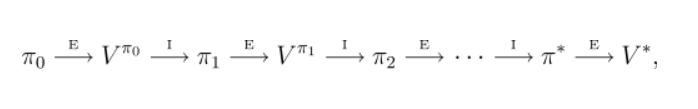

This is the actual process of finding the optimal policy 

1. Start with a policy $\pi$
2. Evaluate $\pi$: Calculate how good it is --- get $V_{\pi}$
3. Improve $\pi$ by updating it to choose better actions 

- For every staet $s$, pick the action $a$ that maximizes $Q_{\pi}(s, a)$

${\pi'(s) = arg \max_{a}{Q^{\pi}}(s, a)}

4. Rinse and repeat: This process is called **Policy Iteration**